In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import sys

import preprocessing_pipeline as pp
import condor_submitter as cs

from sklearn.pipeline import Pipeline
from methods import binning, normalise, smoothing, baseline, FeaExtraction, Classifier, Scattering, utils

from skopt import BayesSearchCV as BSC
from skopt.space import Real, Categorical, Integer
from sklearn.model_selection import ParameterGrid

from preprocessing_pipeline import BayesOptimiser


In [19]:
paramList={
            'binning'   : [['doNothing',{}],
                            ['MeanBin', {'factor':Integer(2,8)}]
                            ],
            'smoothing' : [['doNothing',{}],
                            ['savgol',{'window':Categorical([5, 7, 9, 11]), 'polyorder': Integer(2,4)}],
                            ['PCA',{'n_components': Real(0.8, 0.95)}]
                            ],
            'normalise' :  [['vector',{}],
                            ['min_max',{}], 
                            ['feature',{}]
                            ],
            'baseline': [['doNothing',{}], 
                        ['sg_diff',{'window': Categorical([5, 7, 9, 11]), 'polyorder': Integer(2,4), 'order': Integer(1,2)}],
                        ['rubberband',{'n_jobs': Categorical([2])}]
                        ],
           'FeaExtraction': [['doNothing',{}],
                                ['PCA',{'n_components':Real(0.8,0.95)}],
                                ],
            'Classifier': [['LogisticRegression',{}],
                            ['Random Forest',{}],
                            ['Naive Bayes',{}]
                            ]}
params = ParameterGrid(paramList)
order = ['binning', 'smoothing', 'normalise','baseline','FeaExtraction', 'Classifier']

In [20]:
data = pd.read_hdf('/home/sgcwhitl/Preprocess_Opt/Example_Job/data.hdf')

In [13]:
data.shape

(299607, 169)

<AxesSubplot:>

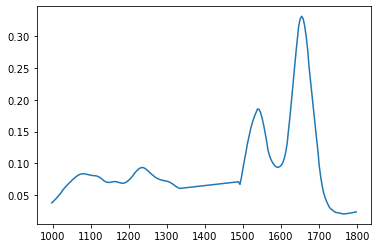

In [14]:
data.mean().plot()

In [7]:
data.head()

5.0                0.048200   
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          5.0                0.030065   
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          5.0                0.033215   
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          5.0                0.045871   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               1785.0  \
1year 1yeardeath 2year 2years 3year 4year 5year ASMA Annotation_loc                                     Case ID Core_x Core_y Corrected Site AJCC/UICC DODvsAlive Date of death Date of recurrence Diagnosis Age DiedvsAlive ECS_x ECS_y ID      Last seen/reviewed Last updated N stage OUTCOME OUTCOME.updated by Overall Death  Pathogical Stage Patient nu  Patient_Number Recurrence? T stage TMA TMA site Tissue Years advancing front type age @ diag date of diag diff envi_loc                                           gender_x gender_y lifespan pN pT radiotherapy recurrence site  site of recurrence stage survival (months)             
True  True       False 1      False False False H    /mnt/b/Google_Drive/PhD/Project with Janet/Labe... 3540    G13    G13    other                    DOD        2010-03-20    2010-03-02         85.0          Died        yes   Y     1.0-G13 NaT                2020-04-21   2b      DOD     PG                 yes            pT4N2bM0         3540        3540           yes         4       1.0 G13      Tumour 1.0   non-cohesive         85         2009-10-19   mod  /mnt/b/Google_Drive/PhD/Project with Janet/Kohl... m        m        152 days 2b 4  NaN          yes        other regional           4a    5.0                0.020521   
                                                                                                                                                                          

In [21]:
samp = data.sample(1000)
example_add = [params[i] for i in np.random.randint(0, len(params), 3)]

print(example_add[0])

split_ob = utils.stratified_group_k_fold(X, y, groups, n_splits = 5, random_state=None)

BayesOpt = pp.BayesOptimiser(example_add[0])
BayesOpt.BayesSearch(samp, samp.reset_index()['DODvsAlive'], split_ob=split_ob)

{'smoothing': ['savgol', {'window': Categorical(categories=(5, 7, 9, 11), prior=None), 'polyorder': Integer(low=2, high=4, prior='uniform', transform='identity')}], 'normalise': ['vector', {}], 'binning': ['doNothing', {}], 'baseline': ['sg_diff', {'window': Categorical(categories=(5, 7, 9, 11), prior=None), 'polyorder': Integer(low=2, high=4, prior='uniform', transform='identity'), 'order': Integer(low=1, high=2, prior='uniform', transform='identity')}], 'FeaExtraction': ['doNothing', {}], 'Classifier': ['LogisticRegression', {}]}
Pipeline(steps=[['binning', IdentityTransformer()], ['smoothing', savgol()],
                ['normalise', vector()], ['baseline', sg_diff()],
                ['FeaExtraction', IdentityTransformer()],
                ['Classifier', LogisticRegression()]])
{'smoothing__window': Categorical(categories=(5, 7, 9, 11), prior=None), 'smoothing__polyorder': Integer(low=2, high=4, prior='uniform', transform='identity'), 'baseline__window': Categorical(categories=(5,

ValueError: array must not contain infs or NaNs

In [33]:


cs.Condor_Job_Pipeline('Example_Job', example_add, )

TypeError: __init__() missing 2 required positional arguments: 'iterable' and 'function'

In [16]:
help(cs)

Help on module condor_submitter:

NAME
    condor_submitter

CLASSES
    builtins.object
        Condor_Job_Pipeline
    
    class Condor_Job_Pipeline(builtins.object)
     |  Condor_Job_Pipeline(name, iterable, function)
     |  
     |  Methods defined here:
     |  
     |  __init__(self, name, iterable, function)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  
     |  prepare(self, X, n=None)
     |  
     |  submission_file(self)
     |  
     |  submit(self)
     |  
     |  ----------------------------------------------------------------------
     |  Data descriptors defined here:
     |  
     |  __dict__
     |      dictionary for instance variables (if defined)
     |  
     |  __weakref__
     |      list of weak references to the object (if defined)

FILE
    /home/sgcwhitl/Preprocess_Opt/condor_submitter.py


